,Dataset,Model,Threshold,ACC,AUC,Sensitivity,Specificity,NPV,PPV,F1
0,train,vit,0.526957,0.855882,0.911014,0.780899,0.938272,0.795812,0.932886,0.850153
1,val,vit,0.857605,0.855670,0.808610,0.823529,0.891304,0.820000,0.893617,0.857143
2,test,vit,0.338216,0.816327,0.816667,0.880000,0.750000,0.857143,0.785714,0.830189


,Dataset,Model,ACC,AUC,Sensitivity,Specificity,NPV,PPV,F1
0,train,vit,"[0.8852941176470588, 0.8852941176470588]","[0.9304341794978499, 0.9304341794978499]","[0.8258426966292135, 0.8258426966292135]","[0.9506172839506173, 0.9506172839506173]","[0.8324324324324325, 0.8324324324324325]","[0.9483870967741935, 0.9483870967741935]","[0.882882882882883, 0.882882882882883]"
1,val,vit,"[0.845360824742268, 0.845360824742268]","[0.809462915601023, 0.809462915601023]","[0.803921568627451, 0.803921568627451]","[0.8913043478260869, 0.8913043478260869]","[0.803921568627451, 0.803921568627451]","[0.8913043478260869, 0.8913043478260869]","[0.845360824742268, 0.845360824742268]"
2,test,vit,"[0.8367346938775511, 0.8367346938775511]","[0.8133333333333334, 0.8133333333333334]","[0.92, 0.92]","[0.75, 0.75]","[0.9, 0.9]","[0.7931034482758621, 0.7931034482758621]","[0.851851851851852, 0.851851851851852]"


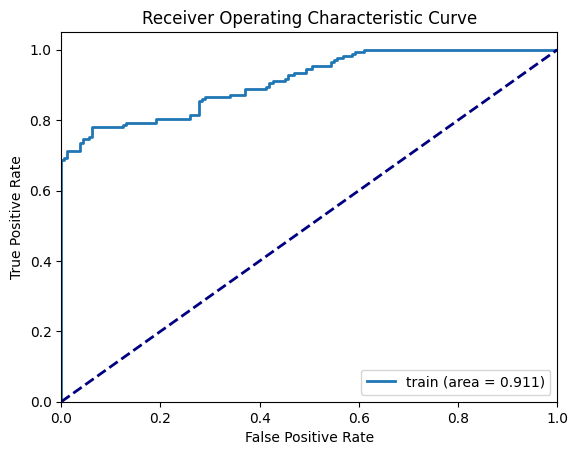

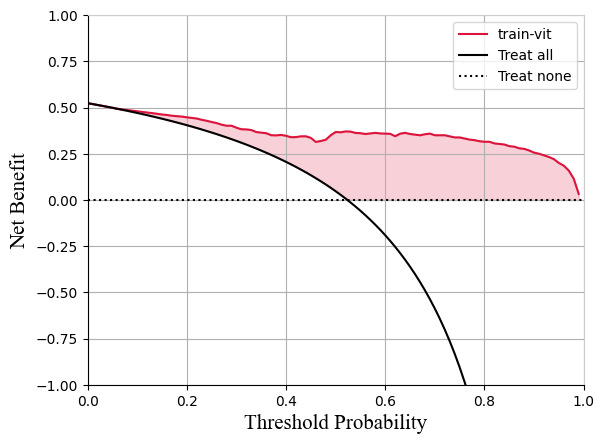

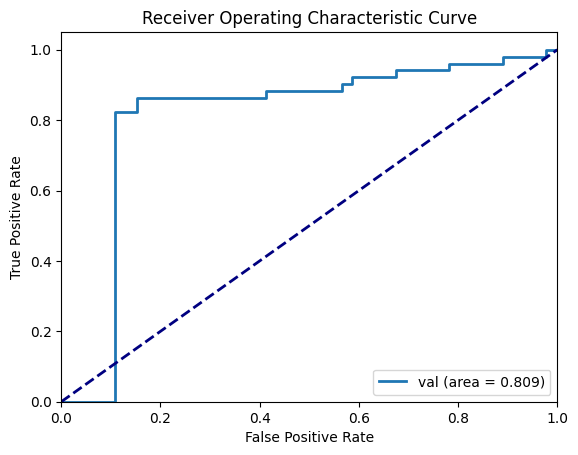

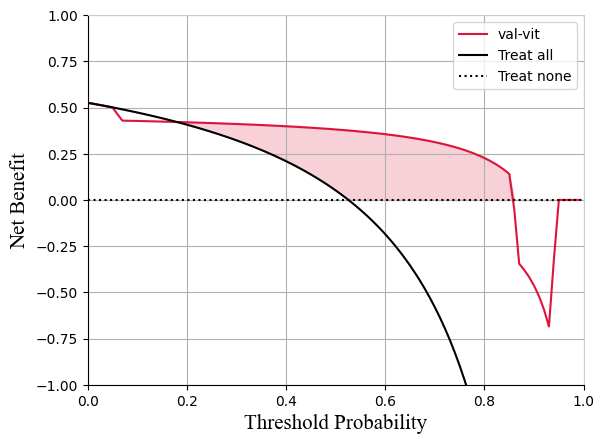

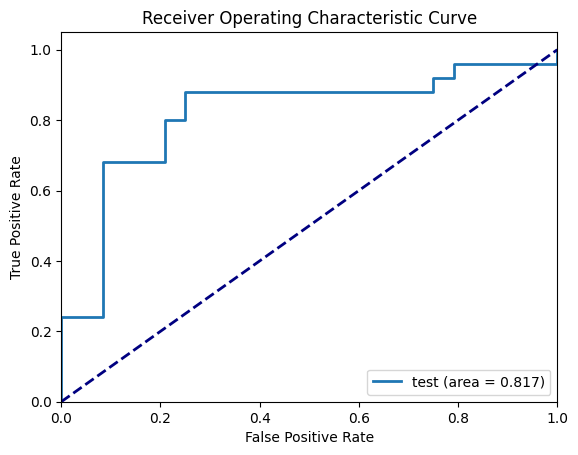

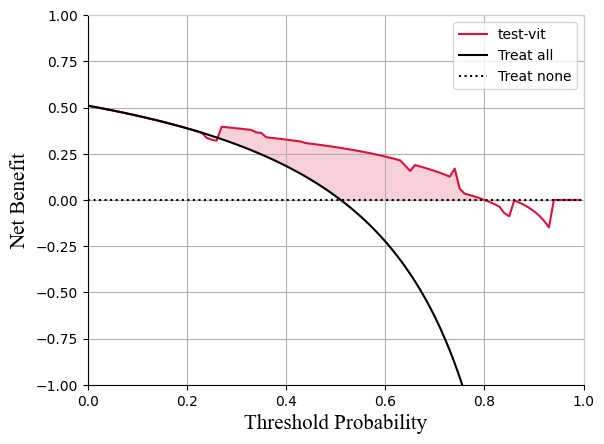

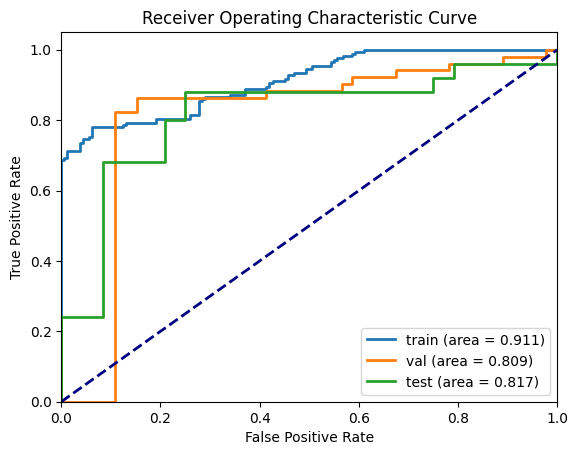

In [2]:
import os
import pandas as pd
import numpy as np
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import calculate_metrics_with_ci as metrics
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import HosmerLemeshow
from pixelmed_calc.medical_imaging.Ploting.plot_metric import plot_multiple_ROCs,plot_calibration_curves,plot_DCA_curve
def calculate_metrics_and_ci(csv_path, dataset_name, model_name):
    data = pd.read_csv(csv_path)
    ytrue = data['target']
    yprob = data['probability_1']
    metric, ci = metrics(np.array(ytrue), np.array(yprob))
    
    result = {
        'Dataset': dataset_name,
        'Model': model_name,
        'Threshold': metric['threshold'],
        'ACC': metric['accuracy'],
        'AUC': metric['auc'],
        'Sensitivity': metric['sensitivity'],
        'Specificity': metric['specificity'],
        'NPV': metric['npv'],
        'PPV': metric['ppv'],
        'F1': metric['f1'],
    }
    ci_result = {
        'Dataset': dataset_name,
        'Model': model_name,
        'ACC': ci['accuracy'],
        'AUC': ci['auc'],
        'Sensitivity': ci['sensitivity'],
        'Specificity': ci['specificity'],
        'NPV': ci['npv'],
        'PPV': ci['ppv'],
        'F1': ci['f1'],
    }
    
    return result, ci_result
# Initialize results DataFrame
results = pd.DataFrame(columns=['Dataset', 'Model', 'Threshold', 'ACC', 'AUC', 'Sensitivity', 'Specificity', 'NPV', 'PPV', 'F1'])
ci_results = pd.DataFrame(columns=['Dataset', 'Model', 'ACC', 'AUC', 'Sensitivity', 'Specificity', 'NPV', 'PPV', 'F1'])
# Define the structure of directories and files
base_dir = r"D:\pixelmedAI\function_pm\note4-指标汇总\run\DL"
datasets = ['train', 'val','test']  # List of dataset names
models = ['vit']  # List of model names
gt_list=[]
prob_list=[]
# Iterate over each model and dataset
for model_name in models:
    for dataset_name in datasets:
        csv_path = os.path.join(base_dir,  f'{dataset_name}_metrics_epoch_1.csv')
        res_csv=pd.read_csv(csv_path)
        gt_list.append(res_csv['target'])
        prob_list.append(res_csv['probability_1'])
        plot_multiple_ROCs([res_csv['target']],[res_csv['probability_1']],models=[dataset_name])
        plot_DCA_curve(res_csv['probability_1'],res_csv['target'],model=f"{dataset_name}-vit")
        #csv_path = os.path.join(base_dir, 'model_name', f'{dataset_name}_metrics_epoch_1.csv')
        if os.path.exists(csv_path):
            result, ci_result = calculate_metrics_and_ci(csv_path, dataset_name, model_name)
            results = pd.concat([results, pd.DataFrame([result])], ignore_index=True)
            ci_results = pd.concat([ci_results, pd.DataFrame([ci_result])], ignore_index=True)
        else:
            print(f"File not found: {csv_path}")
plot_multiple_ROCs(gt_list,prob_list,models=datasets)
# 查看结果
display(results)
display(ci_results)

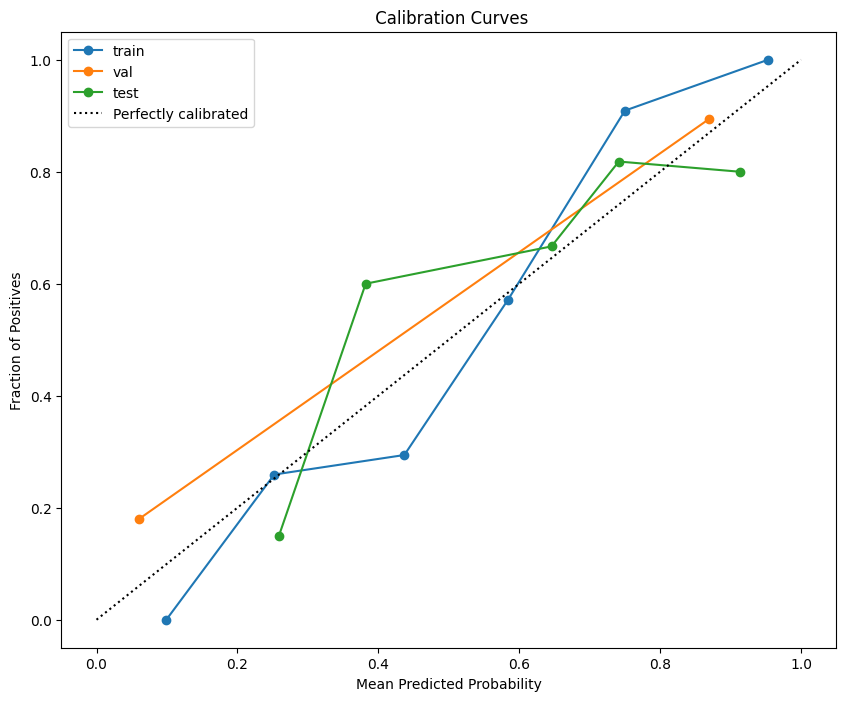

In [3]:
plot_calibration_curves(gt_list,prob_list,models=datasets,title='')

HosmerLemeshow 检验

In [4]:
for set ,gt, prob in zip(datasets,gt_list,prob_list):
    hl=HosmerLemeshow(gt,prob)
    print(set,hl)


train    df      Chi2  p - value
0   8  21.46636    0.00601
val    df      Chi2  p - value
0   8  38.21235    0.00001
test    df      Chi2  p - value
0   8  11.88084     0.1566
